In [269]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import gensim
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [270]:
from nltk import pos_tag # Part-of-Speech (POS) tagging
from nltk.stem import WordNetLemmatizer # lemmatize a word
from nltk.stem.porter import PorterStemmer # Information Retrieval
from nltk.tokenize import word_tokenize # splits sentence into words 
from nltk.tokenize import WhitespaceTokenizer # splits on and discards only whitespace characters
from nltk.corpus import wordnet # large lexical database of English words
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analyzer

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /Users/Vale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Vale/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Vale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Vale/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Vale/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [271]:
from matplotlib.cm import ScalarMappable # for colormap 
from matplotlib.lines import Line2D # line segment in (x,y) coordinate space
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # give our figure extra personalities
from textwrap import wrap # modifying the behavior of functions. 
from wordcloud import WordCloud # to visualize text
from sklearn.feature_extraction.text import TfidfVectorizer # converts a collection of raw documents into a matrix
from gensim.test.utils import common_texts # training corpus
from gensim.models.doc2vec import Doc2Vec, TaggedDocument #  representing documents as a vector
from PIL import Image # import image

# For Machine Learning Model
from sklearn import preprocessing # utility functions
from sklearn.impute import SimpleImputer # replace missing values
from sklearn.ensemble import RandomForestClassifier # learning algorithm Random Forest
from sklearn.linear_model import LogisticRegression # learning algorithm Logistic Regression
from sklearn.model_selection import train_test_split # create training and test data
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score, recall_score
from sklearn import tree # for modeling
from sklearn.metrics import classification_report # for classification report

In [272]:
df=pd.read_csv("Hotel_Reviews.csv")

In [273]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


#### if the rating is under 5, we will categorize as bad review and if the rating is more than 5, we will categorize as good review.


#### Use just the columns negative review, positive review and reviewer score as they are the important features for this analysis.

In [276]:
print(df.columns)

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')


In [277]:
df["review"] = df["Negative_Review"] + df["Positive_Review"]
# select only relevant columns
df = df[["review", "Reviewer_Score"]]
df.head()

,review,Reviewer_Score
0,I am so angry that i made this post available...,2.9
1,No Negative No real complaints the hotel was g...,7.5
2,Rooms are nice but for elderly a bit difficul...,7.1
3,My room was dirty and I was afraid to walk ba...,3.8
4,You When I booked with your company on line y...,6.7


In [278]:
# Sample data (delete at the end)
df = df.sample(frac=0.1,replace=False,random_state=42)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51574 entries, 488440 to 273809
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          51574 non-null  object 
 1   Reviewer_Score  51574 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


## Data pre-processing

#### Check for null and duplicated values

In [282]:
df.isna().sum()

review            0
Reviewer_Score    0
dtype: int64

In [283]:
df.duplicated().sum()

507

In [284]:
duplicates = df[df.duplicated()]

print(duplicates)

                              review  Reviewer_Score
404452        No Negative Everything            10.0
204357            Nothing Everything            10.0
398561            Nothing Everything            10.0
309293            Nothing Everything            10.0
181713            Nothing Everything            10.0
...                              ...             ...
35217           No Negative Location             8.3
362695            Nothing Everything            10.0
121812        No Negative Very good             10.0
163971  No Negative Excellent hotel             10.0
79650     No Negative Great location             7.5

[507 rows x 2 columns]


#### Eliminate the duplicates values as they are a small portion of the dataset.

In [286]:
df1 = df.drop_duplicates()

print(df1)

                                                   review  Reviewer_Score
488440   Would have appreciated a shop in the hotel th...             9.6
274649   No tissue paper box was present at the roomNo...             8.8
374688                Pillows  Nice welcoming and service             7.9
404352  No Negative Everything including the nice upgr...            10.0
451596        No Negative Lovely hotel v welcoming staff              9.6
...                                                   ...             ...
274862   Bathroom water easy made the bathroom wet whe...             7.5
9732     Room very small chair tatty in the room No Po...             4.6
424201   Expensive rates and mini bar prices Roof top ...             7.5
72380    There was a very loud AC machine right outsid...             7.9
273809   This is definitely not 4 stars hotel Location...             5.0

[51067 rows x 2 columns]


In [287]:
import re

def clean_text_basic(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar caracteres especiales y puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # Eliminar espacios extra
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [288]:
import pandas as pd

df1['Clean_Review'] = df1['review'].apply(clean_text_basic)

print(df1.head())

                                                   review  Reviewer_Score  \
488440   Would have appreciated a shop in the hotel th...             9.6   
274649   No tissue paper box was present at the roomNo...             8.8   
374688                Pillows  Nice welcoming and service             7.9   
404352  No Negative Everything including the nice upgr...            10.0   
451596        No Negative Lovely hotel v welcoming staff              9.6   

                                             Clean_Review  
488440  would have appreciated a shop in the hotel tha...  
274649  no tissue paper box was present at the roomno ...  
374688                 pillows nice welcoming and service  
404352  no negative everything including the nice upgr...  
451596         no negative lovely hotel v welcoming staff  


/var/folders/8v/7y7wmz_j7zn54g40y19850_00000gn/T/ipykernel_1405/2162457832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Clean_Review'] = df1['review'].apply(clean_text_basic)


In [289]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Stopwords list
stopwords_nltk = set(stopwords.words('english'))
stopwords_custom = set(["a", "an", "the", "and", "or", "but", "if", "then", "on", "in", "at", "of", "for", "to", "with", "without"])
stopwords_combined = stopwords_nltk.union(stopwords_custom)

def clean_text_no_pos_tagging(text):
    text = text.replace('\t', '')
    text = text.lower()
    # Tokenization
    text = [word.strip(string.punctuation) for word in text.split()]
    text = [word for word in text if not word.startswith("http") and not word.startswith("@")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    text = [x for x in text if x not in stopwords_combined]
    text = [t for t in text if len(t) > 0]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = [t for t in text if len(t) > 1]

    text = ' '.join(text)
    return text

In [290]:
df1['Clean_Review'] = df1['review'].apply(clean_text_no_pos_tagging)

print(df1)

                                                   review  Reviewer_Score  \
488440   Would have appreciated a shop in the hotel th...             9.6   
274649   No tissue paper box was present at the roomNo...             8.8   
374688                Pillows  Nice welcoming and service             7.9   
404352  No Negative Everything including the nice upgr...            10.0   
451596        No Negative Lovely hotel v welcoming staff              9.6   
...                                                   ...             ...   
274862   Bathroom water easy made the bathroom wet whe...             7.5   
9732     Room very small chair tatty in the room No Po...             4.6   
424201   Expensive rates and mini bar prices Roof top ...             7.5   
72380    There was a very loud AC machine right outsid...             7.9   
273809   This is definitely not 4 stars hotel Location...             5.0   

                                             Clean_Review  
488440  would a

/var/folders/8v/7y7wmz_j7zn54g40y19850_00000gn/T/ipykernel_1405/1548737988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Clean_Review'] = df1['review'].apply(clean_text_no_pos_tagging)


## Sentiment analysis

In [292]:
sid = SentimentIntensityAnalyzer()

df1['Sentiments'] = df1['review'].apply(lambda x: sid.polarity_scores(x))
df1 = pd.concat([df1.drop(['Sentiments'], axis=1), df1['Sentiments'].apply(pd.Series)], axis=1)
df1.head()

/var/folders/8v/7y7wmz_j7zn54g40y19850_00000gn/T/ipykernel_1405/2611334824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiments'] = df1['review'].apply(lambda x: sid.polarity_scores(x))


,review,Reviewer_Score,Clean_Review,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,9.6,would appreciated shop hotel sold drinking wat...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the roomNo...,8.8,tissue paper box present roomno positive,0.159,0.580,0.261,0.3400
374688,Pillows Nice welcoming and service,7.9,pillow nice welcoming service,0.000,0.345,0.655,0.6908
404352,No Negative Everything including the nice upgr...,10.0,negative everything including nice upgrade hot...,0.149,0.529,0.322,0.7845
451596,No Negative Lovely hotel v welcoming staff,9.6,negative lovely hotel welcoming staff,0.404,0.137,0.459,0.2023


## Transform each text into numerical vectors

In [294]:
# create doc2vec vector columns
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df1['Clean_Review'].apply(lambda x: x.split(' ')))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df1['Clean_Review'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_df.columns]
df1 = pd.concat([df1, doc2vec_df], axis=1)
df1.head()

,review,Reviewer_Score,Clean_Review,neg,neu,pos,compound,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,9.6,would appreciated shop hotel sold drinking wat...,0.049,0.617,0.334,0.9924,-0.270487,-0.148373,0.495802,-0.224859,0.028331
274649,No tissue paper box was present at the roomNo...,8.8,tissue paper box present roomno positive,0.159,0.580,0.261,0.3400,0.072427,0.130017,0.095506,-0.028191,-0.037573
374688,Pillows Nice welcoming and service,7.9,pillow nice welcoming service,0.000,0.345,0.655,0.6908,0.038992,0.147968,0.097861,-0.101956,-0.053754
404352,No Negative Everything including the nice upgr...,10.0,negative everything including nice upgrade hot...,0.149,0.529,0.322,0.7845,-0.057296,-0.015852,0.133383,-0.107397,0.018579
451596,No Negative Lovely hotel v welcoming staff,9.6,negative lovely hotel welcoming staff,0.404,0.137,0.459,0.2023,0.067652,0.030836,0.139669,-0.040192,0.004382


## TF-IDF process

#### Add the TF-IDF values for every words to find out which word has useful information for analysis.

In [297]:
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df1['Clean_Review']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ['word_' + str(x) for x in tfidf_df.columns]
tfidf_df.index = df1.index
df1 = pd.concat([df1, tfidf_df], axis=1)
df1.head()

,review,Reviewer_Score,Clean_Review,neg,neu,pos,compound,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,...,word_yoghurt,word_yogurt,word_young,word_younger,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,9.6,would appreciated shop hotel sold drinking wat...,0.049,0.617,0.334,0.9924,-0.270487,-0.148373,0.495802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the roomNo...,8.8,tissue paper box present roomno positive,0.159,0.580,0.261,0.3400,0.072427,0.130017,0.095506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,7.9,pillow nice welcoming service,0.000,0.345,0.655,0.6908,0.038992,0.147968,0.097861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,No Negative Everything including the nice upgr...,10.0,negative everything including nice upgrade hot...,0.149,0.529,0.322,0.7845,-0.057296,-0.015852,0.133383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,No Negative Lovely hotel v welcoming staff,9.6,negative lovely hotel welcoming staff,0.404,0.137,0.459,0.2023,0.067652,0.030836,0.139669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
# create the positive and negative label column
df1['posneg'] = df1['Reviewer_Score'].apply(lambda x: 0 if x < 7 else 1)

### Positive and negative reviews word clouds

In [300]:
# Calculate Positive and Negative Review

train_pos = df1[ df1['posneg'] == 1]
train_pos = train_pos['Clean_Review']
train_neg = df1[ df1['posneg'] == 0]
train_neg = train_neg['Clean_Review']

In [301]:
def wordCloud_generator(data, color, color_map):
    
    wave_mask = np.array(Image.open('cloud.png'))
    
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color =color,
                          min_font_size = 12,
                          colormap= color_map,
                          mask = wave_mask
                         ).generate(' '.join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis('off')
    
    plt.show() 

### Positives reviews

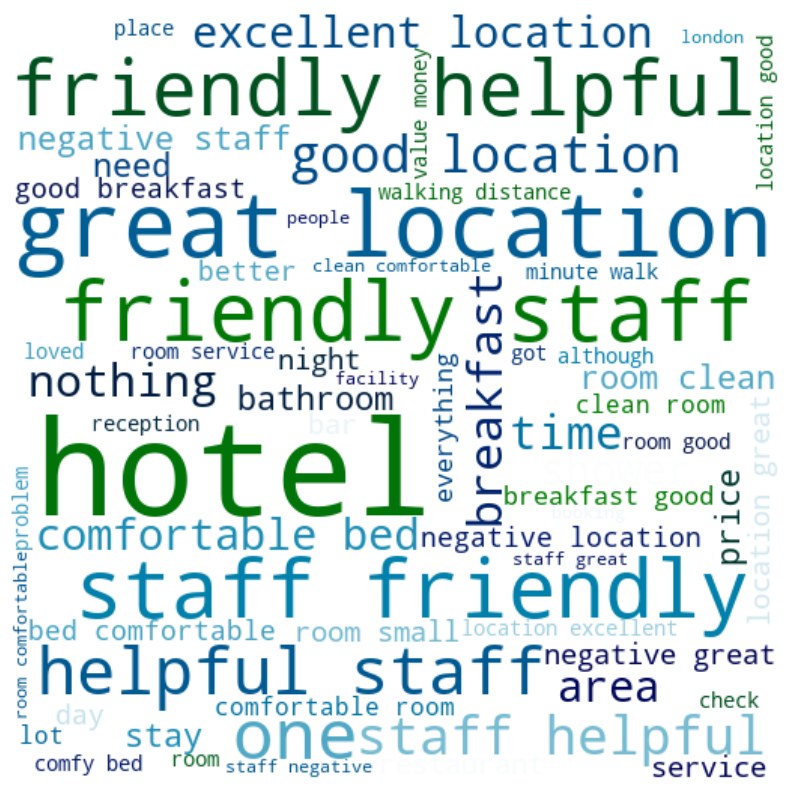

In [303]:
wordCloud_generator(train_pos, 'white', 'ocean')

### Negative reviews

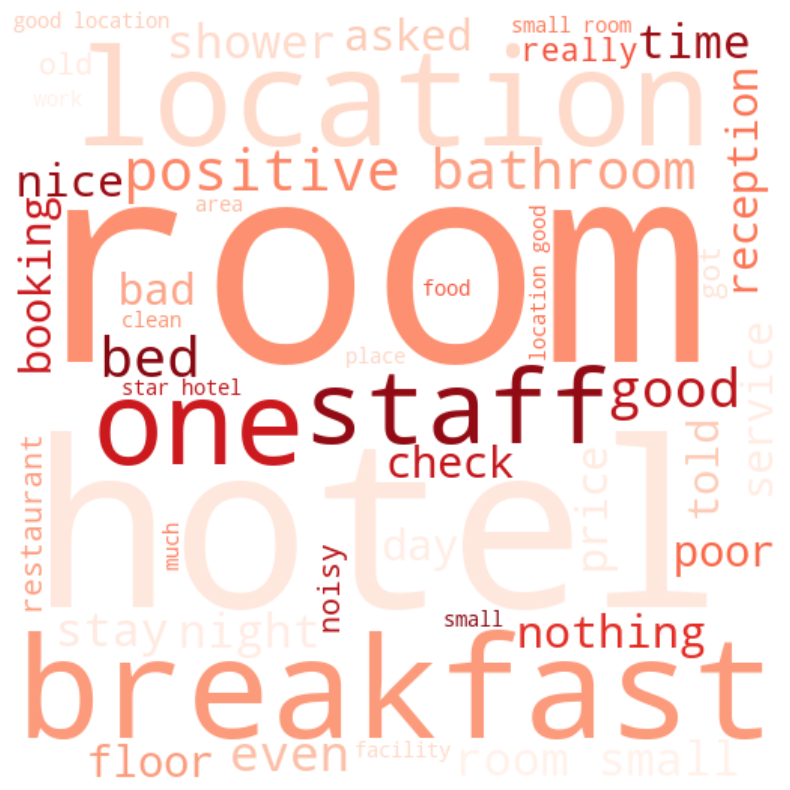

In [305]:
wordCloud_generator(train_neg, 'white', 'Reds')

## Modelling

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, norm='l2')
X = tfidf.fit_transform(df1["Clean_Review"])

In [308]:
# drop the Review and Clean_Review Column, because we won't use it
df1 = df1.drop(['review', 'Clean_Review'], axis = 1)

In [309]:
X = df1.drop(['posneg'],axis = 1)
Y = df1['posneg']

## Split the dataset

In [311]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, 
                                                    Y, test_size=0.25, 
                                                    random_state=42, stratify=Y)

### Random Forest

In [313]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rf, y_train_rf)
preds = model.predict(X_test_rf)

In [314]:
classification_decision1 = (classification_report(y_test_rf, 
                                                  preds))
print(classification_decision1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2186
           1       1.00      1.00      1.00     10581

    accuracy                           1.00     12767
   macro avg       1.00      1.00      1.00     12767
weighted avg       1.00      1.00      1.00     12767



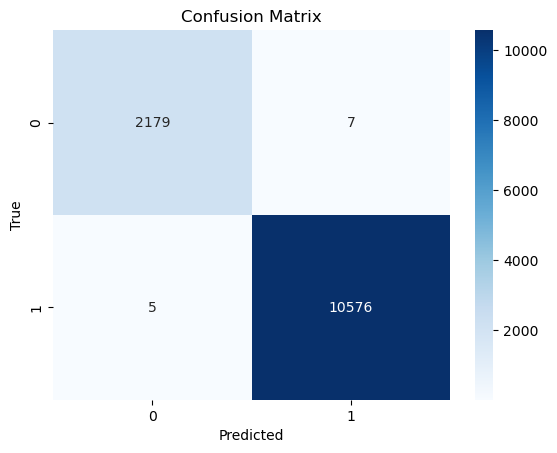

In [315]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_rf, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### XGB regressor

In [317]:
y = df1["Reviewer_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 3.916301483604039e-06
R² Score: 0.9999985833050968


### Ridge regressor

In [320]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 5.54508611735981e-10
R² Score: 0.9999999997994103
